In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./styles/custom.css", "r").read()
    return HTML(styles)
css_styling()

# Characteristics and scalar problems

Based on earlier lessons **add explicit links** we expect that the solution of the Riemann problem obeys certain key rules.

1. The solution can be written as ${\bf q}(\xi)$ where $\xi = x/t$ is the self-similarity coordinate.
2. This means that, in regions where the solution is smooth, it must obey

$$
  \left( \frac{\partial {\bf f}}{\partial {\bf q}} - \xi \textrm{Id} \right) \partial_{\xi} {\bf q} = 0.
$$

3. This means that the self-similarity coordinate matches an eigenvalue $\lambda^{(p)}$ of the Jacobian matrix $\partial {\bf f} / \partial {\bf q}$, and that $\partial_{\xi} {\bf q}$ is an eigenvector.
4. When the solution is not continuous, the solution (if it exists) must obey the Rankine-Hugoniot condition

$$
  {\bf f}({\bf q}_r) - {\bf f}({\bf q}_l) = s \left( {\bf q}_r - {\bf q}_l \right)
$$
where $s$ is the speed of the shock, which is a constant.

## Scalar case

If we consider the key conditions in the scalar case, we see that the Jacobian is simply $f'(q)$. For example, given Burgers' equation
$$
  \partial_t q + \partial_x \left( \tfrac{1}{2} q^2 \right) = 0
$$
we have $f'(q) = q$, and so the characteristic speed is given by the value of the data itself.

We know that the solution is constant along characteristic lines. Let us plot those lines and see where the solution is determined.

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def df_burgers(q):
    """The derivative of the flux function, here defined for Burger's equation."""
    
    return q

In [4]:
def plot_characteristics(df, ql, qr):
    """Plot the characteristic lines for the initial data of a scalar Riemann problem."""
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    dq = np.max([abs(qr-ql), 0.1])
    qmin = np.min([ql, qr])
    qmax = np.max([ql, qr])
    ax1.plot([-1.0, 0.0], [ql, ql], 'b-')
    ax1.plot([0.0, 1.0], [qr, qr], 'g-')
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(qmin - 0.1*dq, qmax + 0.1*dq)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$q(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = df(ql)
    slope_r = df(qr)
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20) 
    x_end_points_l = x_start_points_l + slope_l
    x_end_points_r = x_start_points_r + slope_r
    
    for xs, xe in zip(x_start_points_l, x_end_points_l):
        ax2.plot([xs, xe], [0.0, 1.0], 'b-')
    for xs, xe in zip(x_start_points_r, x_end_points_r):
        ax2.plot([xs, xe], [0.0, 1.0], 'g-')
        
    x_fill = [x_end_points_l[-1], x_start_points_l[-1], x_end_points_r[0]]
    t_fill = [1.0, 0.0, 1.0]
    ax2.fill_between(x_fill, t_fill, 1.0, facecolor = 'red', alpha = 0.5)
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

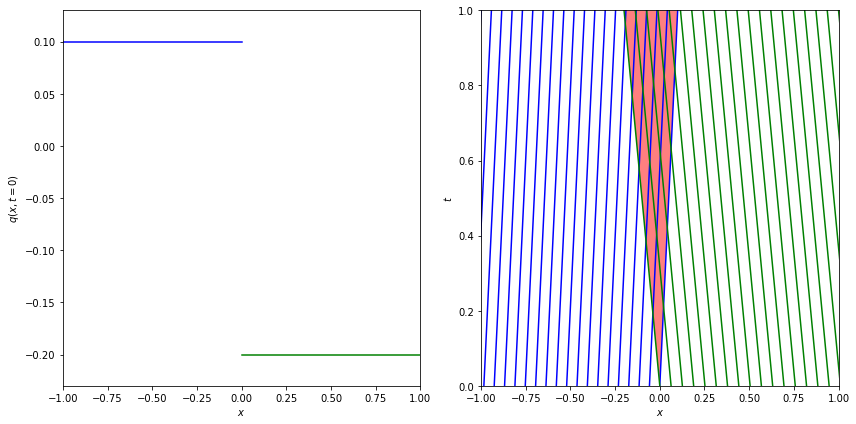

In [5]:
plot_characteristics(df_burgers, 0.1, -0.2)

In the red shaded area the characteristics cross - there is characteristic focusing. The solution is not determined here as it could take the value of the initial data either from the left or from the right, which would give different values.

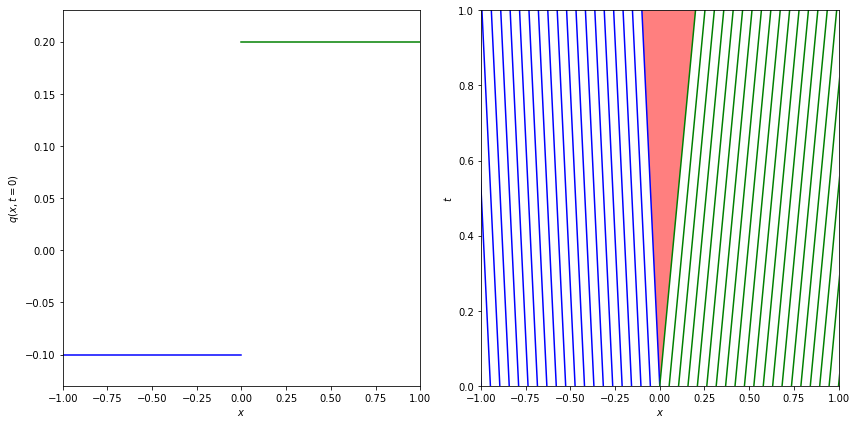

In [6]:
plot_characteristics(df_burgers, -0.1, 0.2)

Alternatively the characteristics could separate. In this case the red shaded region is not determined by the initial data at all.

Try modifying the initial data and see what the results are.

In [ ]:
from ipywidgets import interactive, FloatSlider
def interactive_characteristics(ql, qr):
    return plot_characteristics(df_burgers, ql, qr)
interactive(interactive_characteristics, 
            ql = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.1), 
            qr = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.2))

### Exercise

Try repeating this characteristic analysis using different scalar problems, such as the LWR traffic equation

\begin{equation}
  \partial_t q + \partial_x \left( q (1 - q) \right) = 0.
\end{equation}

## Shocks

When the characteristics cross, we have to find a weak solution that gives a unique self-similar solution. A shock satisfying the Rankine-Hugoniot conditions is such a solution.

For Burger's equation we can solve this explicitly. We have
$$
\begin{align}
  && {\bf f}({\bf q}_r) - {\bf f}({\bf q}_l) & = s \left( {\bf q}_r - {\bf q}_l \right) \\
  \implies && \frac{1}{2} \left( q_r^2 - q_l^2 \right) & = s \left( q_r - q_l \right) \\
  \implies && s & = \frac{1}{2} \frac{ q_r^2 - q_l^2 }{ q_r - q_l } \\
  && & = \frac{q_r + q_l}{2}.
\end{align}
$$
Given the shock speed, we then have the explicit solution to the Riemann problem for Burger's equation in the case of a shock, and when it occurs:
$$
  q_l > q_r \quad \implies \quad q(x, t) = \begin{cases} q_l & x < s t \\ q_r & x > s t \end{cases}
$$
where $s = (q_r + q_l) / 2$.

In [7]:
def plot_shock_burgers(ql, qr):
    """Plot the characteristic lines for the shock solution to Burger's equation."""
    
    assert(ql > qr)
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    dq = np.max([abs(qr-ql), 0.1])
    qmin = np.min([ql, qr])
    qmax = np.max([ql, qr])
    ax1.plot([-1.0, 0.0], [ql, ql], 'b-')
    ax1.plot([0.0, 1.0], [qr, qr], 'g-')
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(qmin - 0.1*dq, qmax + 0.1*dq)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$q(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ql
    slope_r = qr
    s = 0.5 * (qr + ql)
    ax2.plot([0.0, s], [0.0, 1.0], 'k-', linewidth=3)
    
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20) 
    t_end_points_l = np.ones_like(x_start_points_l)
    t_end_points_r = np.ones_like(x_start_points_r)
    
    # Look for intersections
    t_end_points_l = np.minimum(t_end_points_l, x_start_points_l / (s - slope_l))
    t_end_points_r = np.minimum(t_end_points_r, x_start_points_r / (s - slope_r))
    x_end_points_l = x_start_points_l + slope_l * t_end_points_l
    x_end_points_r = x_start_points_r + slope_r * t_end_points_r
    
    for xs, xe, te in zip(x_start_points_l, x_end_points_l, t_end_points_l):
        ax2.plot([xs, xe], [0.0, te], 'b-')
    for xs, xe, te in zip(x_start_points_r, x_end_points_r, t_end_points_r):
        ax2.plot([xs, xe], [0.0, te], 'g-')
    
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

In [ ]:
interactive(plot_shock_burgers, 
            ql = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.1), 
            qr = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.2))

### Exercise

Again, repeat this calculation for the LWR traffic equation.

## Rarefactions

When the characteristics do not cross, we have a rarefaction. Again, for Burger's equation we can solve for this explicitly.

We must have that $\xi = x/t$ is an eigenvalue of the Jacobian $\partial {\bf f} / \partial {\bf q}$. For Burger's equation, that simply means that $\xi = q$.

This holds true within the rarefaction wave - the gap in the $x-t$ plane where the characteristics do not reach. Therefore, we can write the solution in the rarefaction case, and when it holds, as:
$$
  q_l < q_r \quad \implies \quad q(x, t) = \begin{cases} q_l & x < \xi_l t \\ \frac{x}{t} & \xi_l t < x < \xi_r t \\ q_r & x > \xi_r t \end{cases}
$$
where the edges of the rarefaction wave (sometimes known as the *head* and *tail* of the rarefaction) are given by the characteristic speed there, which for Burger's equation means that $\xi_l = q_l$ and $\xi_r = q_r$.

In [8]:
def plot_rarefaction_burgers(ql, qr):
    """Plot the characteristic lines for the rarefaction solution to Burger's equation."""
    
    assert(ql < qr)
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    dq = np.max([abs(qr-ql), 0.1])
    qmin = np.min([ql, qr])
    qmax = np.max([ql, qr])
    ax1.plot([-1.0, 0.0], [ql, ql], 'b-')
    ax1.plot([0.0, 1.0], [qr, qr], 'g-')
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(qmin - 0.1*dq, qmax + 0.1*dq)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$q(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ql
    slope_r = qr
    
    left_edge = np.min([-1.0, -1.0 - slope_l])
    right_edge = np.max([1.0, 1.0 - slope_r])
    x_start_points_l = np.linspace(left_edge, 0.0, 20)
    x_start_points_r = np.linspace(0.0, right_edge, 20)
    x_end_points_l = x_start_points_l + slope_l
    x_end_points_r = x_start_points_r + slope_r
    
    # Rarefaction wave
    xi_l = ql
    xi_r = qr
    xi = np.linspace(xi_l, xi_r, 7)
    x_end_rarefaction = xi
    
    for xs, xe in zip(x_start_points_l, x_end_points_l):
        ax2.plot([xs, xe], [0.0, 1.0], 'b-')
    for xs, xe in zip(x_start_points_r, x_end_points_r):
        ax2.plot([xs, xe], [0.0, 1.0], 'g-')
    for xe in x_end_rarefaction:
        ax2.plot([0.0, xe], [0.0, 1.0], 'r--')
    
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

In [ ]:
interactive(plot_rarefaction_burgers, 
            ql = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.1), 
            qr = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.2))

### Exercise

Again, repeat this calculation for the LWR traffic equation.

## Solution to the Riemann Problem

For Burger's equation, these two cases are sufficient for a complete solution of the Riemann problem. If $q_l < q_r$ then we have a rarefaction. If $q_l > q_r$ then we have a shock. If $q_l = q_r$ then the solution is trivial (although care should be taken in the code!).

In [9]:
def plot_solution_burgers(ql, qr):
    """Plot the characteristic lines for the full solution to Burger's equation."""
    
    fig = plt.figure(figsize=(12,6))
    ax1 = fig.add_subplot(121)

    dq = np.max([abs(qr-ql), 0.1])
    qmin = np.min([ql, qr])
    qmax = np.max([ql, qr])
    ax1.plot([-1.0, 0.0], [ql, ql], 'b-')
    ax1.plot([0.0, 1.0], [qr, qr], 'g-')
    ax1.set_xbound(-1.0, 1.0)
    ax1.set_ybound(qmin - 0.1*dq, qmax + 0.1*dq)
    ax1.set_xlabel(r"$x$")
    ax1.set_ylabel(r"$q(x, t=0)$")
    
    ax2 = fig.add_subplot(122)
    
    slope_l = ql
    slope_r = qr
    
    if (ql <= qr):
        # Rarefaction case
        
        left_edge = np.min([-1.0, -1.0 - slope_l])
        right_edge = np.max([1.0, 1.0 - slope_r])
        x_start_points_l = np.linspace(left_edge, 0.0, 20)
        x_start_points_r = np.linspace(0.0, right_edge, 20)
        x_end_points_l = x_start_points_l + slope_l
        x_end_points_r = x_start_points_r + slope_r
    
        # Rarefaction wave
        xi_l = ql
        xi_r = qr
        xi = np.linspace(xi_l, xi_r, 7)
        x_end_rarefaction = xi
    
        for xs, xe in zip(x_start_points_l, x_end_points_l):
            ax2.plot([xs, xe], [0.0, 1.0], 'b-')
        for xs, xe in zip(x_start_points_r, x_end_points_r):
            ax2.plot([xs, xe], [0.0, 1.0], 'g-')
        for xe in x_end_rarefaction:
            ax2.plot([0.0, xe], [0.0, 1.0], 'r--')
    
    else:
        # Shock case
        s = 0.5 * (qr + ql)
        ax2.plot([0.0, s], [0.0, 1.0], 'k-', linewidth=3)
    
        left_edge = np.min([-1.0, -1.0 - slope_l])
        right_edge = np.max([1.0, 1.0 - slope_r])
        x_start_points_l = np.linspace(left_edge, 0.0, 20)
        x_start_points_r = np.linspace(0.0, right_edge, 20) 
        t_end_points_l = np.ones_like(x_start_points_l)
        t_end_points_r = np.ones_like(x_start_points_r)
    
        # Look for intersections
        t_end_points_l = np.minimum(t_end_points_l, x_start_points_l / (s - slope_l))
        t_end_points_r = np.minimum(t_end_points_r, x_start_points_r / (s - slope_r))
        x_end_points_l = x_start_points_l + slope_l * t_end_points_l
        x_end_points_r = x_start_points_r + slope_r * t_end_points_r
    
        for xs, xe, te in zip(x_start_points_l, x_end_points_l, t_end_points_l):
            ax2.plot([xs, xe], [0.0, te], 'b-')
        for xs, xe, te in zip(x_start_points_r, x_end_points_r, t_end_points_r):
            ax2.plot([xs, xe], [0.0, te], 'g-')
        
    ax2.set_xbound(-1.0, 1.0)
    ax2.set_ybound(0.0, 1.0)
    ax2.set_xlabel(r"$x$")
    ax2.set_ylabel(r"$t$")
    
    fig.tight_layout()

In [ ]:
interactive(plot_solution_burgers, 
            ql = FloatSlider(min=-2.0, max=2.0, step=0.1, value=-0.1), 
            qr = FloatSlider(min=-2.0, max=2.0, step=0.1, value=0.2))

### Exercise

Again, repeat this exercise for the LWR traffic equation.

## Going further

For many nonlinear problems this type of construction is sufficient. However, there are cases where it fails.

Consider the *Buckley-Leverett* equation with flux
$$
  f(q) = \frac{q^2}{q^2 + a (1 - q)^2}
$$
where $a \in (0, 1)$ is a constant. We know that to solve within a rarefaction wave we need the derivative, which is
$$
  f'(q) = \frac{2 a q (1 - q)}{ \left[ q^2 + a (1 - q)^2 \right]}.
$$
As $q$ varies from $0$ to $1$ we see that the derivative has a maximum:

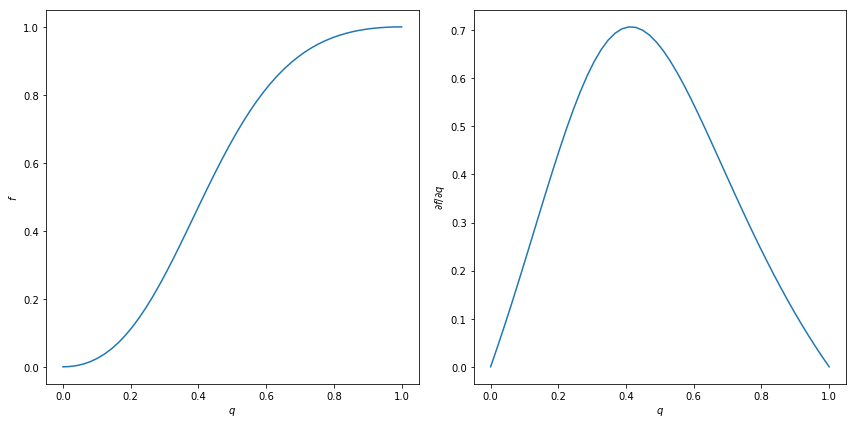

In [10]:
a = 0.5
q = np.linspace(0.0, 1.0)
f = q**2 / (q**2 + a * (1.0 - q)**2)
df = 2.0 * a * q * (1.0 - q) / (q**2 + a * (1.0 - q)**2)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.plot(q, f)
ax1.set_xlabel(r"$q$")
ax1.set_ylabel(r"$f$")
ax2 = fig.add_subplot(122)
ax2.plot(q, df)
ax2.set_xlabel(r"$q$")
ax2.set_ylabel(r"$\partial f / \partial q$")
fig.tight_layout()
plt.show()

This is a problem, as within a rarefaction wave we have to solve $\xi = f'(q)$. More formally we invert the derivative so that, given the characteristic coordinate $\xi$ we have the solution

\begin{equation}
  q = \left( f' \right)^{-1} (\xi)
\end{equation}

But clearly here there are two possible solutions!

This will be a problem for any nonlinear problem where the second derivative, $f''$, vanishes. For problems such as these, we need to look again at the characteristic structure to see what an allowable solution should be.

### Compound waves

We'll consider the Riemann problem for the Buckley-Leverett problem with $q_l = 1$ and $q_r = 0$.

First let's look at the characteristic speeds of the left and right states. Given $f'$ as above we see that $\xi_l = 0 = \xi_r$. So the characteristics are parallel. At first glance we would not expect either a shock or a rarefaction, but a linear discontinuity. However, such a discontinuity would satisfy the Rankine-Hugoniot conditions with the same speed as the neighbouring characteristics - here 0. Let us check:
$$
\begin{align}
  && f_r - f_l & = s \left( q_r - q_l \right) \\
  \implies && s & = \frac{0 - 1}{0 - 1} \\
  && & = 1.
\end{align}
$$

This cannot be right. If the left and right states were separated by a single discontinuity then it would have to travel to the right with speed 1, and points in the $x-t$ plane with $0 < x < t$ would therefore not be determined.

However, neither can we have a single rarefaction. The left and right characteristics speeds would give the boundaries of such a rarefaction, and here they are both $0$.

The alternative is a *compound wave*: one that is made up of more than one piece, separating rarefactions with discontinuities satisfying the Rankine-Hugoniot conditions.

To construct a solution, let us start from the left state $q_l = 1$. We know that we want to connect to the state at $q_r = 0$, so we want $q$ to decrease as we move along the wave curve.

Recall the behaviour of the flux and the characteristic speed $\xi = f'(q)$:

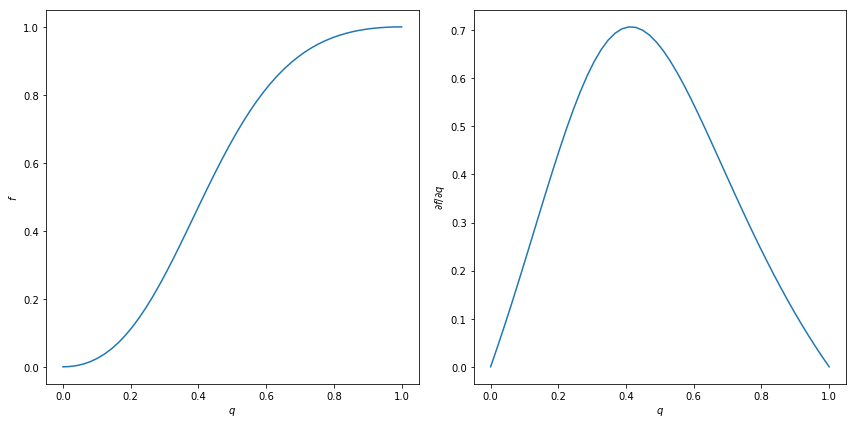

In [11]:
a = 0.5
q = np.linspace(0.0, 1.0)
f = q**2 / (q**2 + a * (1.0 - q)**2)
df = 2.0 * a * q * (1.0 - q) / (q**2 + a * (1.0 - q)**2)
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax1.plot(q, f)
ax1.set_xlabel(r"$q$")
ax1.set_ylabel(r"$f$")
ax2 = fig.add_subplot(122)
ax2.plot(q, df)
ax2.set_xlabel(r"$q$")
ax2.set_ylabel(r"$\partial f / \partial q$")
fig.tight_layout()
plt.show()

As we move from the left state $q_l = 1$ to *smaller* values of $q$ we see that the characteristic coordinate $\xi = f'(q)$ increases, as it should. Therefore the first section of the compound wave could be a rarefaction. However, we cannot get all the way to $q_r = 0$, as after the maximum in $f'$ the characteristic coordinate would start to decrease again.

So, at some point $q_*$ the wave must stop being a rarefaction and join to a discontinuity. In order for the characteristics to make sense, they must *join*, not intersect (as at a shock). That is, the shock speed must match the characteristic speed at $q_*$.

So our first attempt at a solution must try to find a state $q_*$ such that, when connected to the right state $q_r = 0$ using a discontinuity satisfying the Rankine-Hugoniot conditions, the shock speed is $s = f'(q_*)$. This requires that
$$
\begin{align}
  && \frac{q_r^2}{q_r^2 + a (1 - q_r)^2} - \frac{q_*^2}{q_*^2 + a (1 - q_*)^2} & = \frac{2 a q_* (1 - q_*)}{\left[ q_*^2 + a (1 - q_*)^2 \right]^2} \left( q_r - q_* \right) \\
  \implies && \frac{q_*^2}{q_*^2 + a (1 - q_*)^2} & = \frac{2 a q_*^2 (1 - q_*)}{\left[ q_*^2 + a (1 - q_*)^2 \right]^2} \\
  \implies && q_*^2 + a (1 - q_*)^2 & = 2 a  (1 - q_*) \\
  \implies && q_* & = \pm \sqrt{\frac{a}{1+a}}.
\end{align}
$$

The characteristic picture for this shows a rarefaction attached to a *non-classical* shock. The shock is not the standard shock, as the characteristics only converge on it from one side.

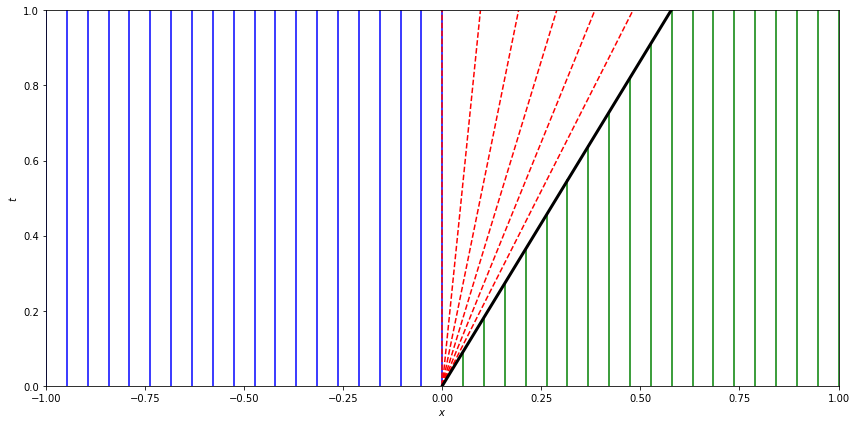

In [12]:
def flux_buckley_leverett(q):
    return q**2 / (q**2 + a * (1.0 - q)**2)

def df_buckley_leverett(q):
    return 2.0 * a * q * (1.0 - q) / (q**2 + a * (1.0 - q)**2)

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

a = 0.5
ql = 1.0
qr = 0.0
qs = np.sqrt(a / (1.0 + a))
s = df_buckley_leverett(qs) # Shock speed matches characteristic speed on left!

slope_l = df_buckley_leverett(ql)
slope_r = df_buckley_leverett(qr)
    
left_edge = np.min([-1.0, -1.0 - slope_l])
right_edge = np.max([1.0, 1.0 - slope_r])
x_start_points_l = np.linspace(left_edge, 0.0, 20)
x_start_points_r = np.linspace(0.0, right_edge, 20)
x_end_points_l = x_start_points_l + slope_l
x_end_points_r = x_start_points_r + slope_r
    
# Rarefaction wave
xi_l = df_buckley_leverett(ql)
xi_r = df_buckley_leverett(qs)
xi = np.linspace(xi_l, xi_r, 7)
x_end_rarefaction = xi

# Shock intersections
t_end_points_r = np.ones_like(x_start_points_r)
t_end_points_r = np.minimum(t_end_points_r, x_start_points_r / (s - slope_r))

for xs, xe in zip(x_start_points_l, x_end_points_l):
    ax.plot([xs, xe], [0.0, 1.0], 'b-')
for xs, xe, te in zip(x_start_points_r, x_end_points_r, t_end_points_r):
    ax.plot([xs, xe], [0.0, te], 'g-')
for xe in x_end_rarefaction:
    ax.plot([0.0, xe], [0.0, 1.0], 'r--')
# Shock
ax.plot([0.0, s], [0.0, 1.0], 'k-', linewidth=3)
    
ax.set_xbound(-1.0, 1.0)
ax.set_ybound(0.0, 1.0)
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$t$")
    
fig.tight_layout()

Whilst this approach can be generalised (see e.g. the [thesis by Voss](http://134.130.184.8/opus/volltexte/2005/1210/)), we usually hope that the system is simple enough (i.e., $f''(q) \ne 0$, or the equivalent for a system) that we only have to deal with shocks or rarefactions.